<a href="https://colab.research.google.com/github/vsjwonder/AI_Steps/blob/master/Malaria_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If gpu is connected it will output following –

'/device:GPU:0'
Otherwise, it will output following

''
Verify TPU:

In [136]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

# Check GPU connected

In [137]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device connected is: {}'.format(tf.test.gpu_device_name()))

else:

   print("GPU not connected, please install GPU version of TF")

Default GPU Device connected is: /device:GPU:0


# If tpu is connected it will output following

Connected to TPU
Otherwise, it will output following

Not connected to TPU

In [ ]:
#import os 

#if 'COLAB_TPU_ADDR' not in os.environ: 
#  print('Not connected to TPU') 
#else: 
#  print("Connected to TPU") 


# Upload File By Mounting Google Drive:
To mount your drive inside “mntDrive” folder execute following –
Then you’ll see a link, click on link, then allow access, copy the code that pops up, paste it at “Enter your authorization code:”.

In [3]:
from google.colab import drive 
drive.mount('/vsjDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /vsjDrive



Now to see all data in your google drive you need to execute following:

In [4]:
! ls "/vsjDrive"

'My Drive'


#Alternative is AWS Amazone S3

In [ ]:
#import pandas as pd
#import s3fs
#df= pd.read_csv("------- s3 path---------")

#Reading zip file by using path of folder from mntDrive folder mounted previously

In [ ]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/vsjDrive/My Drive/Dataset.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	printing all the contents of the zip file 
	#zip.printdir() 

	# extracting all the files in content folder from our zip file of google drive 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 


# Dowload file directly from site

In [ ]:
#https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv -P "/content/drive/My Drive/app"

# Extracting files to folder from zip file and storing to location

In [ ]:
#import zipfile

#archive = zipfile.ZipFile(file_name)

#for file in archive.namelist():
#    if file.startswith('Dataset'):
#        archive.extract(file, '/vsjDrive/My Drive/AI_DataSet/Malaria_Image')

# If you want to delet file use following code

In [ ]:
#!rm -f -rf "/vsjDrive/My Drive/AI_DataSet/Malaria_Image/Dataset"

#Check drive content

In [60]:
!ls "/content/Dataset"

Test  Train


Actual working starts here

In [139]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [140]:
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [190]:
# set consistent random seed
random_seed = 2018
np.random.seed(random_seed)  

# Choose next block code

# ____________________________________________________________#

# Or bellow is simple code gives images as x and labels as y

In [228]:
def get_pictures(folder):
    Images= []
    Labels = []
    label =0
    for labels in os.listdir(folder):
        if labels == 'Parasitized':
            label = 0
        elif labels == 'Uninfected':
            label =1
        for images in os.listdir(folder+labels):
            try:
                image = cv2.imread(folder+labels+r'/'+images)
                image = cv2.resize(image, (224,224))
                Images.append(image)
                Labels.append(label)
            except:
                None
    return shuffle(Images, Labels, random_state= 12863686)

def get_labels(code):
    labels = {0:'Parasitized', 1:'Uninfected'}
    
    return labels[code]

In [229]:
Images, Labels = get_pictures(r'/content/Dataset/Train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [230]:
TestImages, TestLabels = get_pictures(r'/content/Dataset/Test/') #Extract the training images from the folders.

TestImages = np.array(TestImages) #converting the list of images to numpy array.
TestLabels = np.array(TestLabels)

In [145]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)
print("Shape of TestImages:",TestImages.shape)
print("Shape of TestLabels:",TestLabels.shape)

Shape of Images: (416, 224, 224, 3)
Shape of Labels: (416,)
Shape of TestImages: (134, 224, 224, 3)
Shape of TestLabels: (134,)


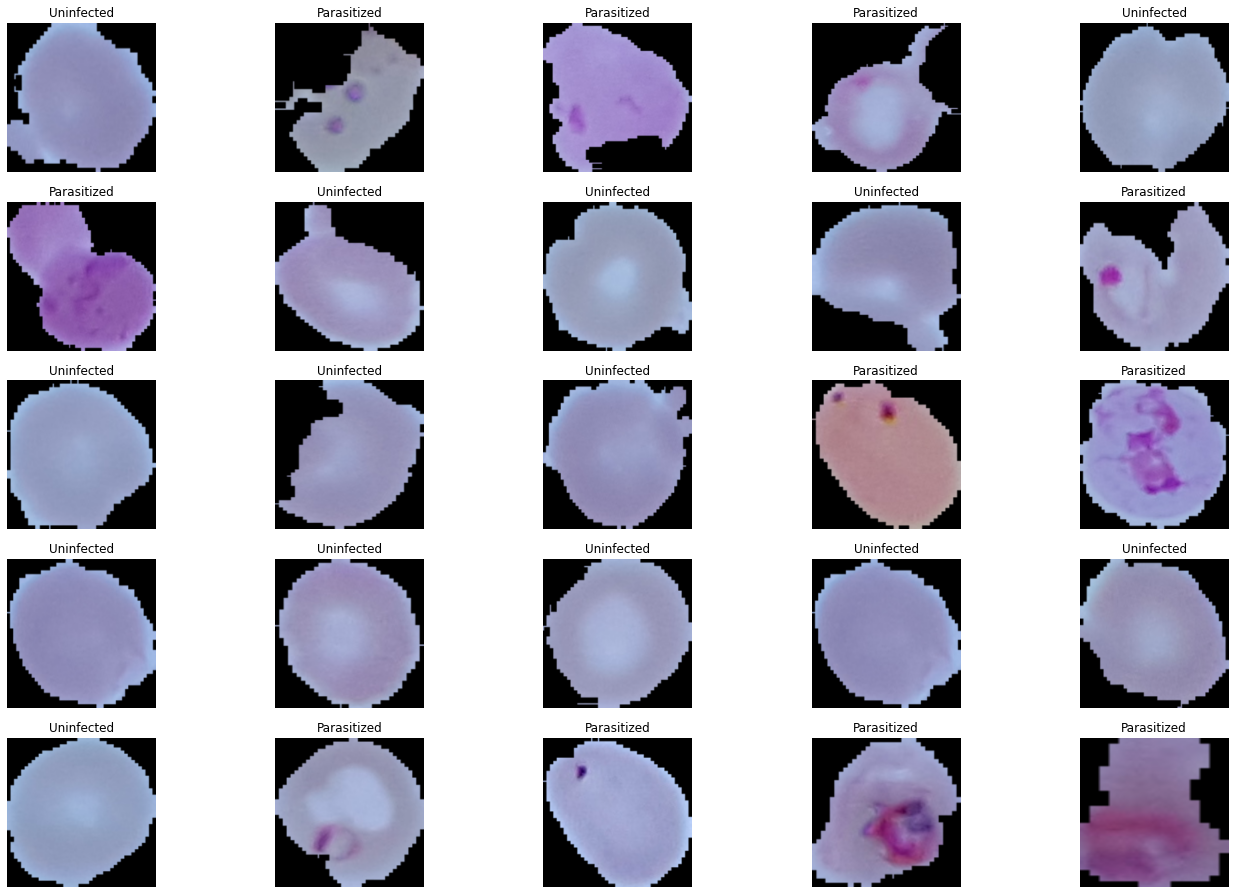

In [323]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_labels(Labels[rnd_number]))
        ax[i,j].axis('off')

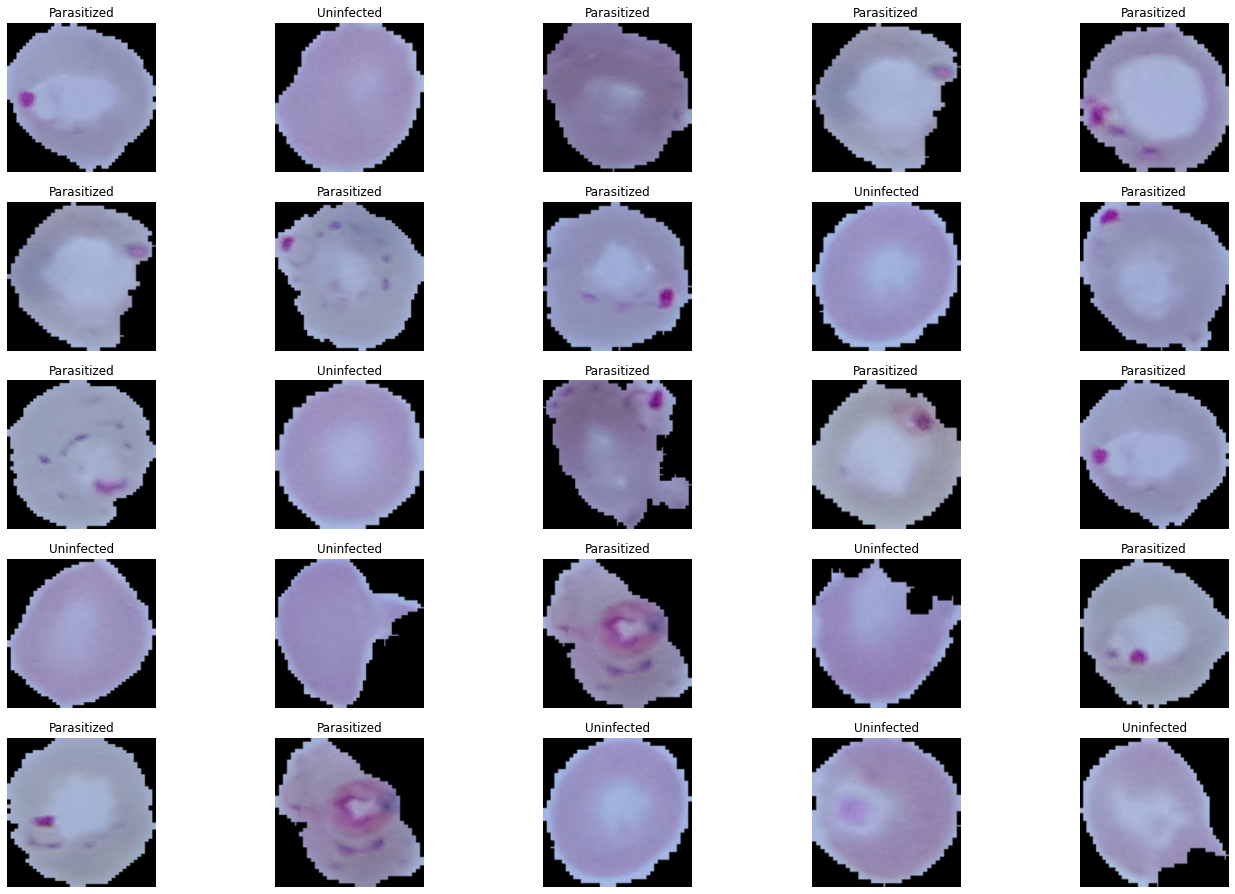

In [324]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(TestImages))
        ax[i,j].imshow(TestImages[rnd_number])
        ax[i,j].set_title(get_labels(TestLabels[rnd_number]))
        ax[i,j].axis('off')

In [325]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Images, Labels, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (332, 224, 224, 3)
Shape of validation images is: (84, 224, 224, 3)
Shape of labels is: (332,)
Shape of labels is: (84,)



# Store image size so can re-size all the images to size 224 X 224

No need if above code used

In [149]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Test'
valid_path = '/content/Dataset/Train'

# vgg19 stored in mobilnet

http://www.robots.ox.ac.uk/~vgg/research/very_deep/
Convolutional networks (ConvNets) currently set the state of the art in visual recognition. The aim of this project is to investigate how the ConvNet depth affects their accuracy in the large-scale image recognition setting.

Our main contribution is a rigorous evaluation of networks of increasing depth, which shows that a significant improvement on the prior-art configurations can be achieved by increasing the depth to 16-19 weight layers, which is substantially deeper than what has been used in the prior art. To reduce the number of parameters in such very deep networks, we use very small 3×3 filters in all convolutional layers (the convolution stride is set to 1). Please see our publication for more details.

Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
Here we will be using imagenet weights

#################################################################

The VGG() class takes a few arguments that may only interest you if you are looking to use the model in your own project, e.g. for transfer learning.

For example:

include_top (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.

weights (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.

input_tensor (None): A new input layer if you intend to fit the model on new data of a different size.

input_shape (None): The size of images that the model is expected to take if you change the input layer.

pooling (None): The type of pooling to use when you are training a new set of output layers.

classes (1000): The number of classes (e.g. size of output vector) for the model.

Next, let’s look at using the loaded VGG model to classify ad hoc photographs.

To know more about Convlutional layers check out
https://keras.io/api/layers/convolution_layers/convolution2d/

Following details are sourced from https://www.geeksforgeeks.org/introduction-convolution-neural-network/
where they used images from Deep Learning Udacity

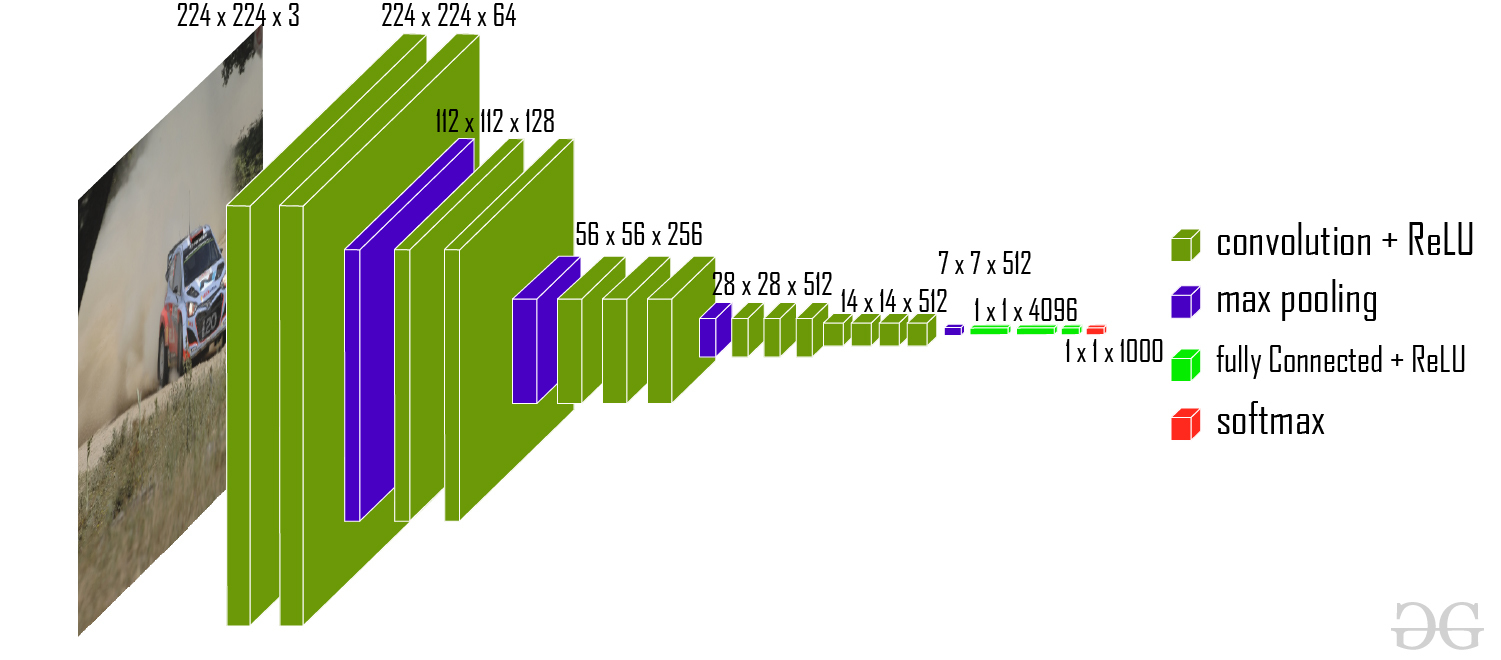

Convolution Neural Network

Convolution Neural Networks or covnets are neural networks that share their parameters. Imagine you have an image. It can be represented as a cuboid having its length, width (dimension of the image) and height (as image generally have red, green, and blue channels).

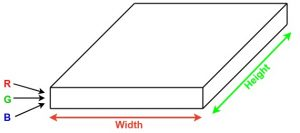

Now imagine taking a small patch of this image and running a small neural network on it, with say, k outputs and represent them vertically. Now slide that neural network across the whole image, as a result, we will get another image with different width, height, and depth. Instead of just R, G and B channels now we have more channels but lesser width and height. his operation is called Convolution. If patch size is same as that of the image it will be a regular neural network. Because of this small patch, we have fewer weights.

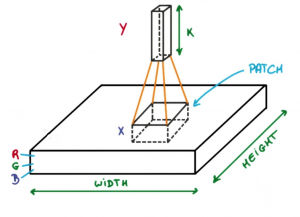
Image source: Deep Learning Udacity

Now let’s talk about a bit of mathematics which is involved in the whole convolution process.

Convolution layers consist of a set of learnable filters (patch in the above image). Every filter has small width and height and the same depth as that of input volume (3 if the input layer is image input).
For example, if we have to run convolution on an image with dimension 34x34x3. Possible size of filters can be axax3, where ‘a’ can be 3, 5, 7, etc but small as compared to image dimension.
During forward pass, we slide each filter across the whole input volume step by step where each step is called stride (which can have value 2 or 3 or even 4 for high dimensional images) and compute the dot product between the weights of filters and patch from input volume.
As we slide our filters we’ll get a 2-D output for each filter and we’ll stack them together and as a result, we’ll get output volume having a depth equal to the number of filters. The network will learn all the filters.
Layers used to build ConvNets

A covnets is a sequence of layers, and every layer transforms one volume to another through differentiable function.
Types of layers:
Let’s take an example by running a covnets on of image of dimension 32 x 32 x 3.

Input Layer: This layer holds the raw input of image with width 32, height 32 and depth 3.
Convolution Layer: This layer computes the output volume by computing dot product between all filters and image patch. Suppose we use total 12 filters for this layer we’ll get output volume of dimension 32 x 32 x 12.
Activation Function Layer: This layer will apply element wise activation function to the output of convolution layer. Some common activation functions are RELU: max(0, x), Sigmoid: 1/(1+e^-x), Tanh, Leaky RELU, etc. The volume remains unchanged hence output volume will have dimension 32 x 32 x 12.
Pool Layer: This layer is periodically inserted in the covnets and its main function is to reduce the size of volume which makes the computation fast reduces memory and also prevents from overfitting. Two common types of pooling layers are max pooling and average pooling. If we use a max pool with 2 x 2 filters and stride 2, the resultant volume will be of dimension 16x16x12.

# CNN | Introduction to Pooling Layer
The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter.
For a feature map having dimensions nh x nw x nc, the dimensions of output obtained after a pooling layer is

(nh - f + 1) / s x (nw - f + 1)/s x nc
where,

-> nh - height of feature map
-> nw - width of feature map
-> nc - number of channels in the feature map
-> f  - size of filter
-> s  - stride length
A common CNN model architecture is to have a number of convolution and pooling layers stacked one after the other.

Why to use Pooling Layers?
Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image.
Types of Pooling Layers
Max Pooling
Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
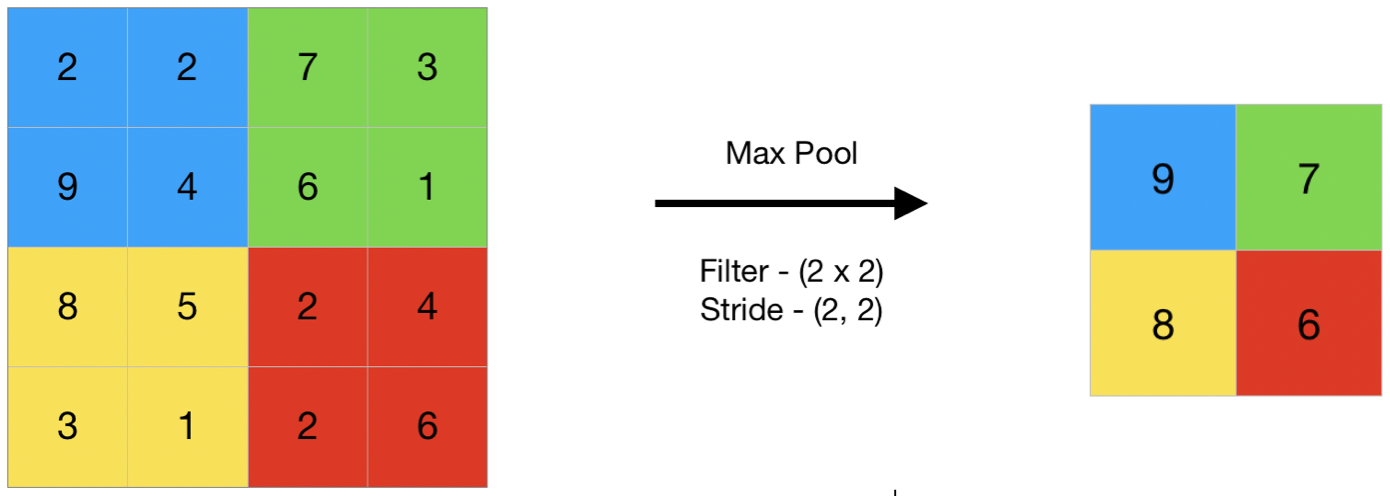


In [326]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
print(mobilnet.summary())
# See imput image is IMAGE_SIZE = [224, 224] 3 for 224x224 RGB

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Perhaps three of the more popular models are as follows:

VGG (e.g. VGG16 or VGG19).
GoogLeNet (e.g. InceptionV3).
Residual Network (e.g. ResNet50).

# Initially, we only train the added layers. We do so because the weights of these layers are initialized to random values and need more training than the VGG19/ResNet layers. Hence we freeze the VGG19/ResNet and only train the rest of the network.

# don't train existing weights
Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all the layers.

#What does Freezing a Layer mean?
Freezing a layer prevents its weights from being modified. This technique is often used in transfer learning, where the base model(trained on some other dataset)is frozen.

How does freezing affect the speed of the model?
If you don’t want to modify the weights of a layer, the backward pass to that layer can be completely avoided, resulting in a significant speed boost. For e.g. if half your model is frozen, and you try to train the model, it will take about half the time compared to a fully trainable model.

On the other hand, you still need to train the model, so if you freeze it too early, it will give inaccurate predictions.

What is the ‘novel’ approach?
The authors demonstrated a way to freeze the layers one by one as soon as possible, resulting in fewer and fewer backward passes, which in turn lowers training time.

At first, the entire model is trainable (exactly like a regular model). After a few iterations the first layer is frozen, and the rest of the model is continued to train. After another few iterations , the next layer is frozen, and so on.

#In Keras, each layer has a parameter called “trainable”. For freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained. That’s it! We go over each layer and select which layers we want to train.

In [327]:
# Freeze all the layers
for layer in mobilnet.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in mobilnet.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb4f0ed85c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f42d38d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f9f8a550> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb4f4449d30> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f30d5b70> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f29cdcc0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb4f29d53c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f29f2c50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f29f2dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f29e2588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb4f6a974a8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

# our layers are only from VGG - you can add more if you want

In [ ]:

# model.add(Dense(32, input_shape=(16,), kernel_initializer = 'he_uniform', 
  # kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
#model.add(Dense(16, activation = 'relu')) 
#model.add(Dense(8))

# Get the symbolic outputs of each "key" layer ( giving them unique names).

In [328]:
layer_dict = dict([(layer.name, layer) for layer in mobilnet.layers])

# You can pick and choose which layers are trainable.

# Just load the model without mentioning weights (Imagenet)

For example, perhaps you want to retrain some of the convolutional layers deep in the model, but none of the layers earlier in the model. For example:

In [ ]:
# load model without classifier layers
# model = VGG16(include_top=False, input_shape=(224, 224, 3))
# mark some layers as not trainable
# model.get_layer('block1_conv1').trainable = False
# model.get_layer('block1_conv2').trainable = False
# model.get_layer('block2_conv1').trainable = False
# model.get_layer('block2_conv2').trainable = False

# Getting number of output classes means path of each folder in train set which is stored in folders variable name. length of folders will be output class numbers useful for last layer (Here it is 2)

In [329]:
folders = glob("/content/Dataset/Train/*")
folders

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']

Flatten is used to flatten the input. For example, if flatten is applied to layer having input shape as (batch_size, 2,2), then the output shape of the layer will be (batch_size, 4)

Flatten has one argument as follows
#keras.layers.Flatten(data_format = None)
data_format is an optional argument and it is used to preserve weight ordering when switching from one data format to another data format. It accepts either channels_last or channels_first as value. channels_last is the default one and it identifies the input shape as (batch_size, ..., channels) whereas channels_first identifies the input shape as (batch_size, channels, ...)

#flatten is stored in x


In [330]:
x = Flatten()(mobilnet.output)

In [331]:
print (x)

Tensor("flatten_6/Identity:0", shape=(None, 25088), dtype=float32)


Line 1 creates a new Dense layer and add it into the model. Dense is an entry level layer provided by Keras, which accepts the number of neurons or units (32) as its required parameter. If the layer is first layer, then we need to provide Input Shape, (16,) as well. Otherwise, the output of the previous layer will be used as input of the next layer. All other parameters are optional.

First parameter represents the number of units (neurons).

input_shape represent the shape of input data.

kernel_initializer represent initializer to be used. he_uniform function is set as value.

kernel_regularizer represent regularizer to be used. None is set as value.

kernel_constraint represent constraint to be used. MaxNorm function is set as value.

activation represent activation to be used. relu function is set as value.

Line 3 creates second Dense layer with 16 units and set relu as the activation function.

Last creates final Dense layer with 8 units

for more info check 

https://www.tutorialspoint.com/keras/keras_layers.htm

# prediction last dense layer is output no. stored in folders (Parasite and Uninfected) 2 and activation is used is softmax

In mathematics, the softmax function, also known as softargmax or normalized exponential function,:198 is a function that takes as input a vector z of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval {\displaystyle (0,1)}(0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.

![alt text](https://miro.medium.com/max/700/1*czt98NR7yXV6tdnJ0j7vBw.png)

# Folders length which was defined previously by assigning final result folder no. (here i.e. 2)
# x is flatten the output
# Then assign model an objects like
# Inputs from our vgg19 models and output we want as defined in prediction i.e dense layer [(final output of 2 class here) into (*) x] flatten

In [332]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

# Dense is an tensor object which segrigates the inputs in no. out put given at first place by using activation function and final out put is flatten (here flatten the vgg19 model out put and segrigate them in two classes by using softmax activation)

In [ ]:
# Check how dense work
# r=Dense(16, input_shape=(5,3))
# print(r)

# This compiled model compatible with model.fit for datagenerator augmentation we need to copile it differently

In [198]:
#model.compile(loss='binary_crossentropy', metrics=['acc'])

In [333]:
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# Here you can creat your own model by defining diferent layes

This can be achieved using Conv2D, MaxPooling2D and dense (Dense is an tensor object which segrigates the inputs in no. out put given at first place by using activation function and final out put is flatten (here flatten the model out put and segrigate them in two classes by using softmax activation)) layer in keras as follows:

In [334]:
from tensorflow.keras.layers import MaxPooling2D

In [335]:
### Create Model from scratch using CNN
model1=Sequential()
model1.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(500,activation="relu"))
model1.add(Dense(2,activation="softmax"))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)            

Padding Full :
Let’s assume a kernel as a sliding window. We have to come with the solution of padding zeros on the input array. This is a very famous implementation and will be easier to show how it works with a simple example, consider x as a filter and h as an input array.

x[i] = [6, 2]
h[i] = [1, 2, 5, 4]

Using the zero padding, we can calculate the convolution.

You have to invert the filter x, otherwise the operation would be cross-correlation. First step, (now with zero padding):

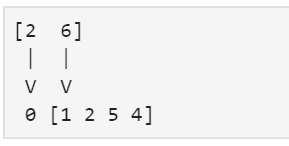
= 2 * 0 + 6 * 1 = 6

Second step:

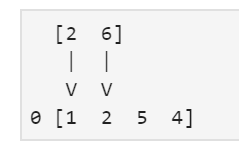

= 2 * 1 + 6 * 2 = 14

Third step:

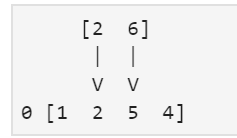

= 2 * 2 + 6 * 5 = 34

Fourth step:

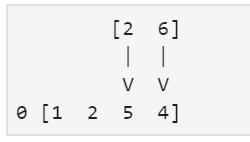

 2 * 5 + 6 * 4 = 34

Fifth step:

= 2 * 4 + 6 * 0 = 8

The result of the convolution for this case, listing all the steps above, would be: Y = [6 14 34 34 8]

Padding same :
In this type of padding, we only append zero to the left of the array and to the top of the 2D input matrix.
output will be [ 6 14 34 34]

Padding valid :
In this type of padding, we got the reduced output matrix as the size of the output array is reduced. We only applied the kernel when we had a compatible position on the h array, in some cases you want a dimensionality reduction.

Output will be [14 34 34]

# Tell the model what cost and optimization method to use
# Categorical_crossentropy as at last we have 2 nodes two outputs

optimizer used is adam

if one then binary_crossentropy

In [336]:
model1.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [337]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)            

# Augumentation
This is done to overcome the overfitting
# Augumentation stored in train_datagen

In [338]:
from keras.preprocessing.image import ImageDataGenerator
# Use the Image Data Generator to import the images from the dataset
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                    )

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

# Applied augumentation to training and testing images and created the Train_set and Test_set

In [339]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/Dataset/Train/',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = val_datagen.flow_from_directory(
        '/content/Dataset/Test/',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


# Epoch and Batch size
100 images 10 epochs batch size of 10 means 10 cycles for each epoch with 10 images in each cycle.

Epochs
One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
Epoch is 50 and steps per epoch is 13
Here 13 is batch size which is 416/13 = 32 images in each batch will pass forward and backward in CNN
So for each epoch 13 such cycles will be done to pass entire images and this will be repeated for 50 times 

In [27]:
len(X_train)

13

In [28]:
len(X_val)

5

# To check epoch and steps per epoch
Ceiling (ceiling value) Returns the closest integer greater than or equal to a given number. 45.61 = 46.

In [90]:
import math
#g= math.ceil(45.61)
#print(g)

BATCH_SIZE=32
 
TRAINING_SIZE = 416
 
VALIDATION_SIZE = 134

# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
 
steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)

print (compute_steps_per_epoch(416))
print (steps_per_epoch)
print (val_steps)

13
13
5


In [340]:
#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)
print("Images in training set",ntrain)
print("Images in validation set",nval)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32
steps_per_epoch= round((ntrain) / (batch_size),0)
validation_steps= round((nval / batch_size),0)
print('steps per epoch is ',steps_per_epoch)
print('validation steps are',validation_steps)

Images in training set 332
Images in validation set 84
steps per epoch is  10.0
validation steps are 3.0


# Fitting the own model (model1) to our training set for training and validating the model on test set and storing history in r

During fitting model at each epoch augmented images are passed in each cycle

In [344]:

#The training part
#We train for 50 epochs with about 10 steps per epoch

history = model1.fit_generator(
          train_generator,
          steps_per_epoch=10,
          epochs=50,
          validation_data=val_generator,
          validation_steps=3)

Epoch 1/50
10/10 [==============================] - 3s 349ms/step - loss: 0.7143 - acc: 0.4781 - val_loss: 0.6896 - val_acc: 0.5476
Epoch 2/50
10/10 [==============================] - 3s 342ms/step - loss: 0.6919 - acc: 0.5500 - val_loss: 0.6660 - val_acc: 0.6548
Epoch 3/50
10/10 [==============================] - 4s 350ms/step - loss: 0.6681 - acc: 0.6313 - val_loss: 0.6357 - val_acc: 0.6310
Epoch 4/50
10/10 [==============================] - 3s 342ms/step - loss: 0.6531 - acc: 0.6187 - val_loss: 0.6108 - val_acc: 0.5476
Epoch 5/50
10/10 [==============================] - 3s 342ms/step - loss: 0.6091 - acc: 0.6812 - val_loss: 0.6280 - val_acc: 0.5476
Epoch 6/50
10/10 [==============================] - 3s 342ms/step - loss: 0.6200 - acc: 0.6219 - val_loss: 0.4681 - val_acc: 0.7262
Epoch 7/50
10/10 [==============================] - 3s 342ms/step - loss: 0.5703 - acc: 0.6750 - val_loss: 0.7084 - val_acc: 0.5833
Epoch 8/50
10/10 [==============================] - 3s 344ms/step - loss: 0.

# VGG model application

compilation of VGG19 model stored as model before

In [342]:
# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['acc']
)

# Fitting the model and storing history in vgg

In [343]:
# fit the model
# Run the cell. It will take some time to execute
#The training part
#We train for 64 epochs with about 100 steps per epoch
vgg = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=10,
    validation_data=val_generator,
    validation_steps=3,
    epochs=50)

Epoch 1/50
10/10 [==============================] - 5s 538ms/step - loss: 1.4201 - acc: 0.5188 - val_loss: 0.4979 - val_acc: 0.7976
Epoch 2/50
10/10 [==============================] - 5s 515ms/step - loss: 0.7240 - acc: 0.6219 - val_loss: 0.7438 - val_acc: 0.5714
Epoch 3/50
10/10 [==============================] - 5s 522ms/step - loss: 0.5813 - acc: 0.7031 - val_loss: 0.3765 - val_acc: 0.8571
Epoch 4/50
10/10 [==============================] - 5s 522ms/step - loss: 0.5555 - acc: 0.7063 - val_loss: 0.2843 - val_acc: 0.8690
Epoch 5/50
10/10 [==============================] - 5s 516ms/step - loss: 0.4669 - acc: 0.7688 - val_loss: 0.2708 - val_acc: 0.9524
Epoch 6/50
10/10 [==============================] - 5s 515ms/step - loss: 0.3904 - acc: 0.8188 - val_loss: 0.2815 - val_acc: 0.9524
Epoch 7/50
10/10 [==============================] - 5s 514ms/step - loss: 0.4211 - acc: 0.8031 - val_loss: 0.2438 - val_acc: 0.9167
Epoch 8/50
10/10 [==============================] - 5s 511ms/step - loss: 0.

# Ploting loss and accuracy for our fitted model (history) 

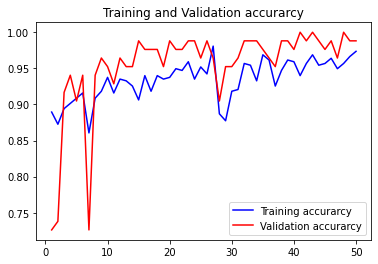

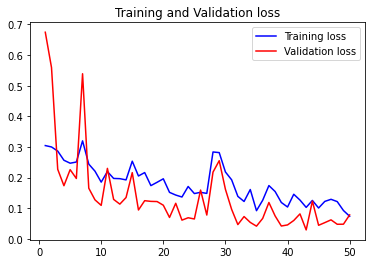

In [221]:

#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Ploting loss and accuracy for vgg fited model (vgg)

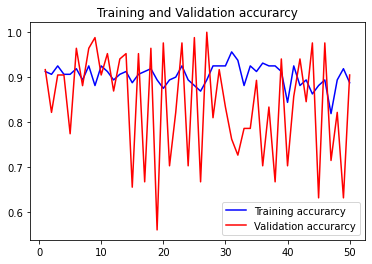

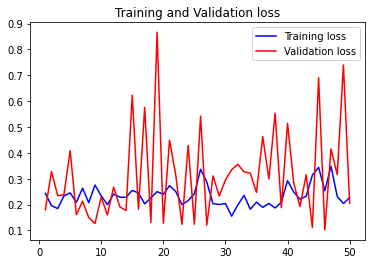

In [222]:

#lets plot the train and val curve
#get the details form the history object
acc = vgg.history['acc']
val_acc = vgg.history['val_acc']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Now save our trained models as h5 file so we can easily reuse it without doing extensive training and validation again and again

In [223]:
#Save the model
model1.save_weights('Own_model_wieghts.h5')
model1.save('Own_model_keras.h5')

In [224]:
from tensorflow.keras.models import load_model
#Save the model
model.save_weights('vgg_model_wieghts.h5')
model.save('vgg_model_keras.h5')

#Now lets predict on the first 50 Images of the test set

In [284]:
#X_test, y_test = read_and_process_image(TestImages[0:10]) #Y_test in this case will be empty.
x = np.array(TestImages[0:50])
test_datagen = ImageDataGenerator(rescale=1./255)

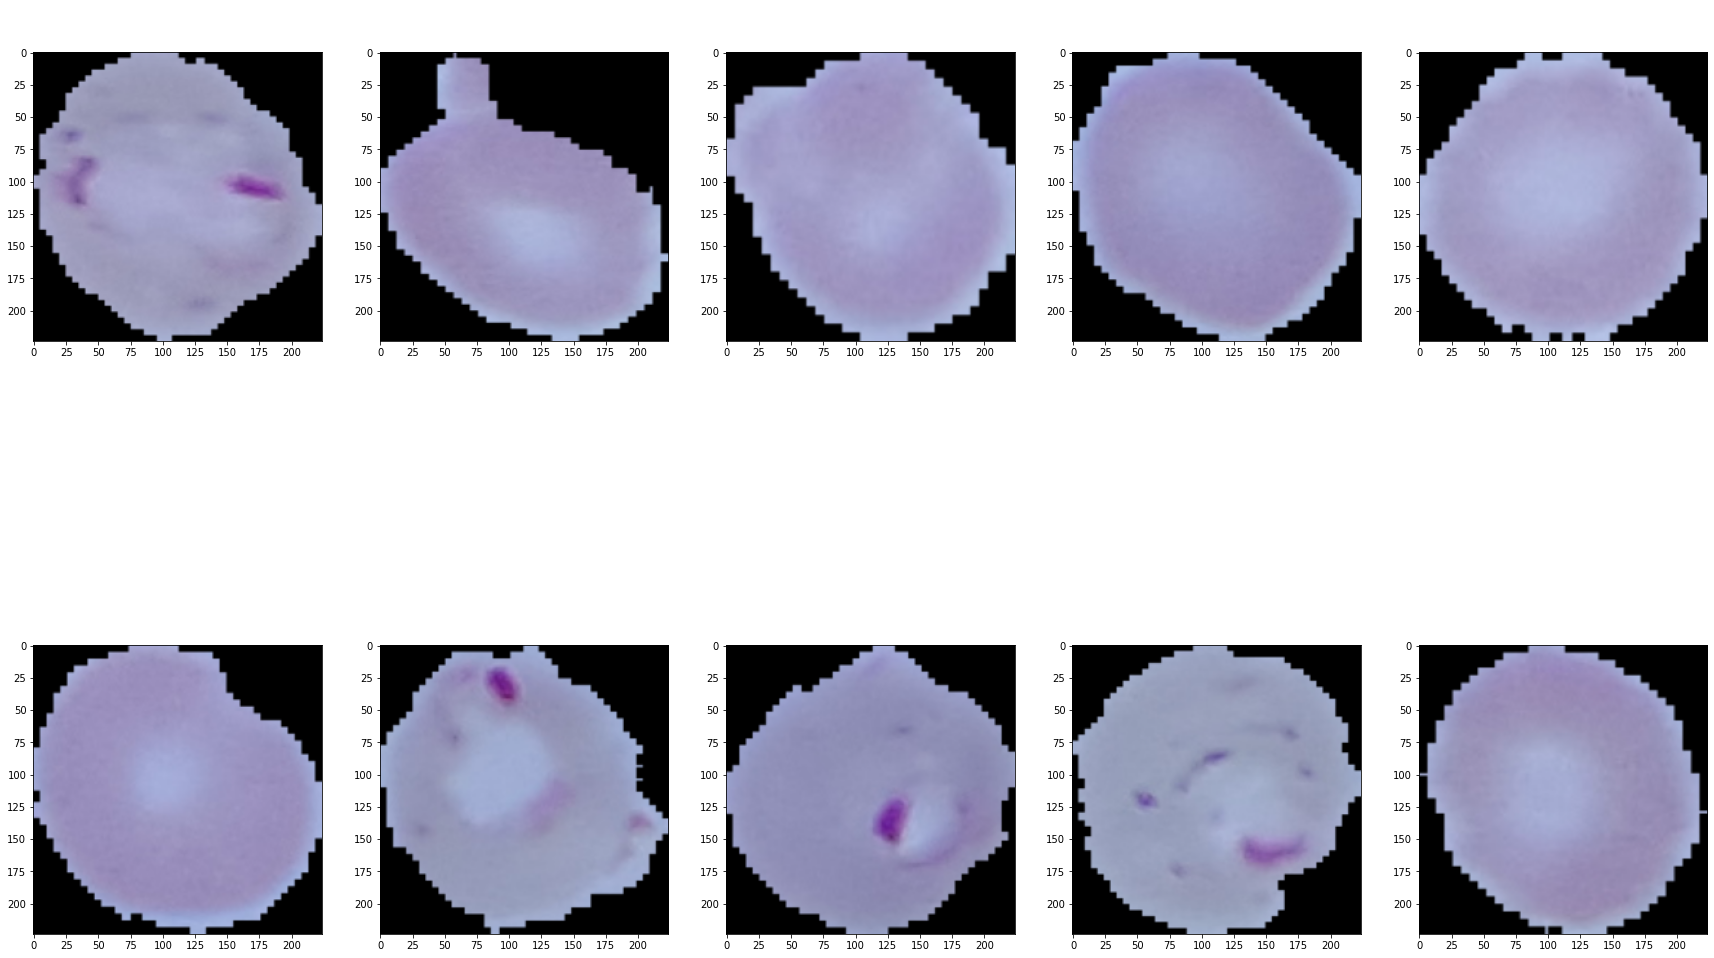

In [306]:
i = 0
text_labels = [] #Creat a list to hold the labels we are going to generate
plt.figure(figsize=(30,20)) #Figure size we are going to plot
for batch in test_datagen.flow(x, batch_size=1):
	pred = np.argmax(model.predict(batch)) # predicting based on our model image from image data generator
	if pred > 0.5:
		text_labels.append('Uninfected') # if prediction is > 0.5 it is Uninfected i.e. our folder placement 1
	else:
		text_labels.append('Parasite') # if prediction is < 0.5 it is Uninfected i.e. our folder placement 0
	plt.subplot(2, 5, i + 1) # plot multiple plots
	plt.title('This is a ' + text_labels[i] + '\n(VGG19 model prediction)', fontsize=22, color='w') # title predicted for image
	imgplot = plt.imshow(batch[0]) # plotting the image
	i += 1
	if i % 10 == 0:
		break
plt.show()

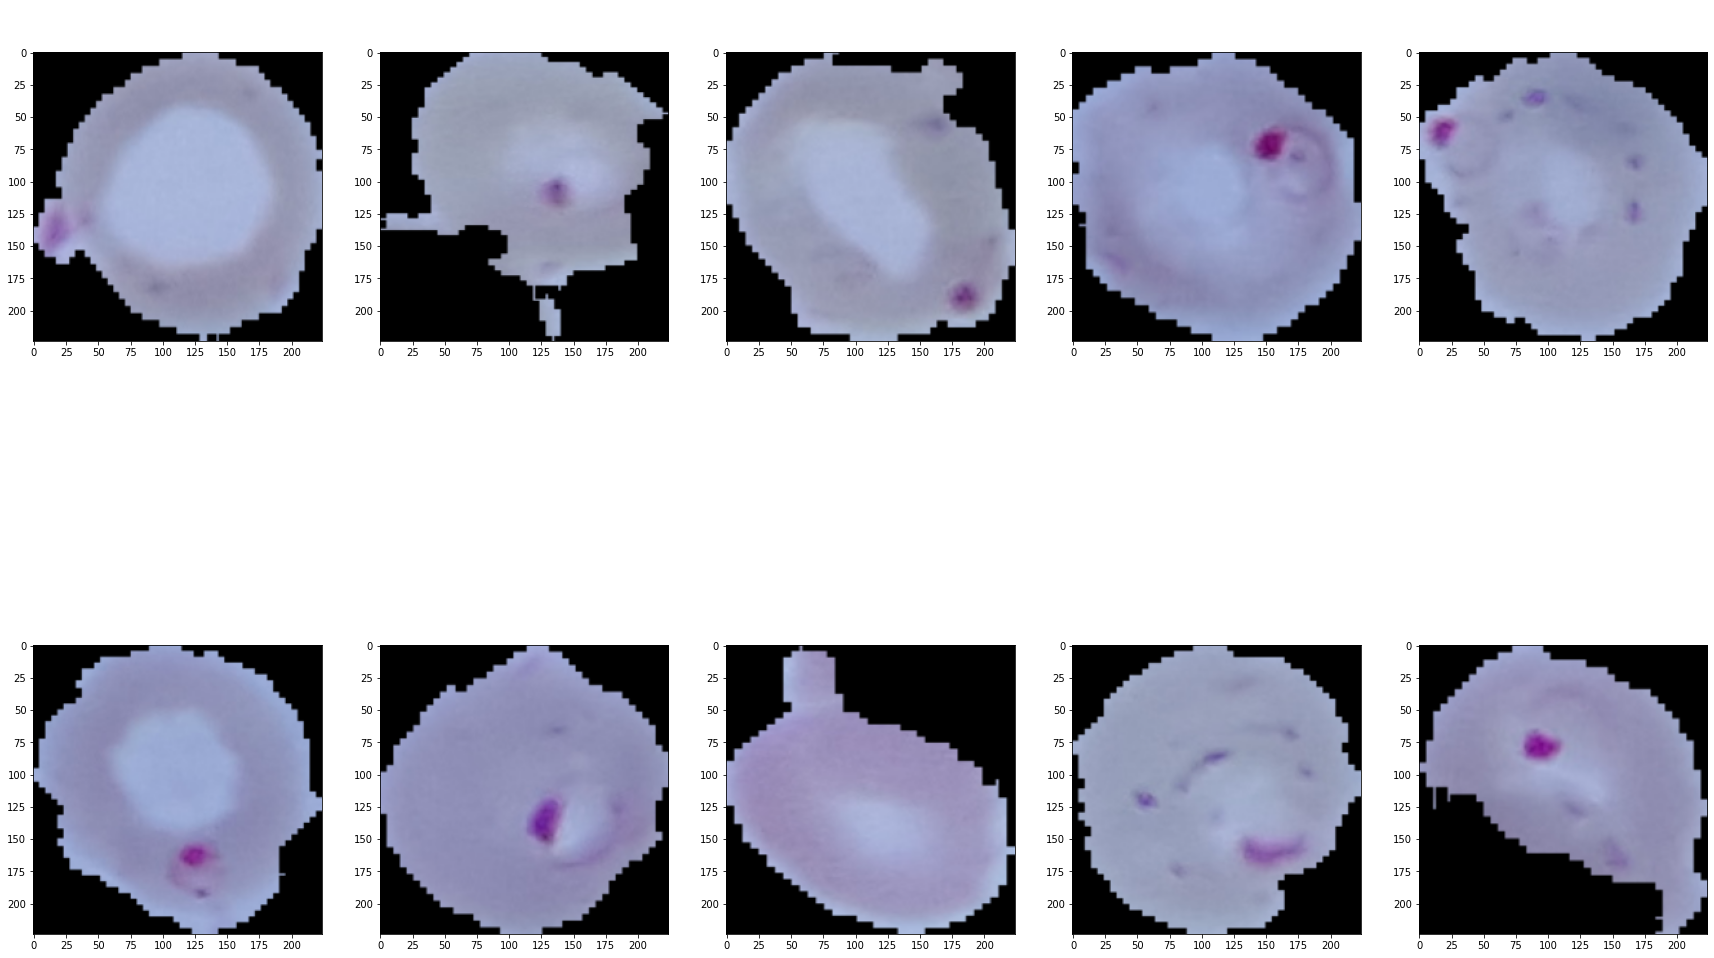

In [307]:
i = 0
text_labels = [] #Creat a list to hold the labels we are going to generate
plt.figure(figsize=(30,20)) #Figure size we are going to plot
for batch in test_datagen.flow(x, batch_size=1):
	pred = np.argmax(model1.predict(batch)) # predicting based on our model image from image data generator
	if pred > 0.5:
		text_labels.append('Uninfected') # if prediction is > 0.5 it is Uninfected i.e. our folder placement 1
	else:
		text_labels.append('Parasite') # if prediction is < 0.5 it is Uninfected i.e. our folder placement 0
	plt.subplot(2, 5, i + 1) # plot multiple plots
	plt.title('This is a ' + text_labels[i] + '\n(Own model prediction)', fontsize=22, color='w') # title predicted for image
	imgplot = plt.imshow(batch[0]) # plotting the image
	i += 1
	if i % 10 == 0:
		break
plt.show()

# Prediction for test_set by using our model and vgg model and storing it as y_pred1 and y_pred respectively

# Recalling our stored models

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('vgg_model_keras.h5')

In [ ]:
model1=load_model('Own_model_keras.h5')

# Loading image for analysis
target size matched

In [268]:
inf_img=image.load_img('/content/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_113.png',target_size=(224,224))

In [269]:
img=image.load_img('/content/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_143.png',target_size=(224,224))

# Converting image to array keras image to array functon
# So it will take a PIL Image instance and turn it into a numpy array, with dtype float32. If you start from a PNG image, the values inside the image will lie between 0 and 255. This is usually represented by an 8-bit unsigned integer; img_to_array however will cast to float. In your code example, the array is divided by 255, so that's why you end up with floats between 0 and 1. Stored in final image

In [ ]:
nor=image.img_to_array(img)
nor

In [39]:
nor.shape

(224, 224, 3)

In [40]:
nor=nor/255

In [ ]:
inf=image.img_to_array(inf_img)
inf

In [42]:
inf.shape

(224, 224, 3)

# Divide 255 as this is done to test dataset for rescaling

In [43]:
inf=inf/255

# The expand_dims() function is used to expand the shape of an array.
# Insert a new axis that will appear at the axis position in the expanded array shape.
#Axis 0 check the array

In [ ]:
import numpy as np
a = np.array([3, 4])
print(a)
print(a.shape)
b = np.expand_dims(a, axis=0)
print(b)

b.shape



[3 4]
(2,)
[[3 4]]


(1, 2)

# Axis 1 check the array

In [ ]:
a = np.array([3, 4])
print(a)
print(a.shape)
b = np.expand_dims(a, axis=1)
print(b)

b.shape

[3 4]
(2,)
[[3]
 [4]]


(2, 1)

# Applying it to our image previous shape was (224, 224, 3)

# preprocess_input

Keras works with batches of images. So, the first dimension is used for the number of samples (or images) you have.

When you load a single image, you get the shape of one image, which is (size1,size2,channels) our image is (224, 224, 3).

In order to create a batch of images, you need an additional dimension: (samples, size1,size2,channels) our image becomes (1, 224, 224, 3) 1 indicates number of images.

The preprocess_input function is meant to adequate your image to the format the model requires.

Some models use images with values ranging from 0 to 1. Others from -1 to +1. Others use the "caffe" style, that is not normalized, but is centered.

From the source code, Resnet is using the caffe style.

You don't need to worry about the internal details of preprocess_input. But ideally, you should load images with the keras functions for that (so you guarantee that the images you load are compatible with preprocess_input).

#final processed input image is stored in img_data

In [44]:
nor=np.expand_dims(nor,axis=0)
nor=preprocess_input(nor)
nor.shape

(1, 224, 224, 3)

#final processed infected input image is stored in img_data1

In [45]:
inf=np.expand_dims(inf,axis=0)
inf=preprocess_input(inf)
inf.shape

(1, 224, 224, 3)

In [270]:
def ImageProcessing (Image):
  Image = image.img_to_array(Image)
  Image = Image/255
  Image = np.expand_dims(Image,axis=0)
  Image = preprocess_input(Image)
  return Image


In [271]:
inf_img=image.load_img('/content/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_113.png',target_size=(224,224))
inf = ImageProcessing(inf_img)

In [272]:
img=image.load_img('/content/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_143.png',target_size=(224,224))
nor = ImageProcessing(inf_img)

# Applying vgg model predictions to both image

In [273]:
NorPredVGG=model.predict(nor)
NorPredVGG

array([[2.3298996e-07, 9.9999976e-01]], dtype=float32)

In [274]:
InfPredVGG=model.predict(inf)
InfPredVGG

array([[2.3298996e-07, 9.9999976e-01]], dtype=float32)

# Applying our own model predictions to both image

In [275]:
NorPredOwn=model1.predict(nor)
NorPredOwn

array([[0., 1.]], dtype=float32)

In [276]:
InfPredOwn=model1.predict(inf)
InfPredOwn

array([[0., 1.]], dtype=float32)

In [277]:
print(NorPredVGG)
print(InfPredVGG)
print(NorPredOwn)
print(InfPredOwn)

[[2.3298996e-07 9.9999976e-01]]
[[2.3298996e-07 9.9999976e-01]]
[[0. 1.]]
[[0. 1.]]


# Argmax: Array highest value get argument of it (means index of that)
# axis 1 means in a row bigger will get there maximum number index

Argmax applied to predicted array of uninfected image and stored in j and s with vgg and own model respectively

Argmax applied to predicted array of parasite image and stored in j1 and s1 with vgg and own model respectively


In [278]:
NorVGG=np.argmax(model.predict(nor), axis=1)

In [279]:
InfVGG=np.argmax(model.predict(inf), axis=1)

In [280]:
NorOwn=np.argmax(model1.predict(nor), axis=1)

In [281]:
InfOwn=np.argmax(model1.predict(inf), axis=1)

In [282]:
print(NorVGG)
print(InfVGG)
print(NorOwn)
print(InfOwn)

[1]
[1]
[1]
[1]


In [ ]:
if(NorVGG==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


#Important sourses

https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9

https://medium.com/@pathakvishnudutt123/malaria-detection-using-deep-learning-a5eb887ab187

https://github.com/vpaliwal1/Malaria-Detection-Using-VGG19/blob/master/Malaria_Detection.ipynb

# Now let's define a loss function that will seek to maximize the activation of a specific filter (filter_index) in a specific layer (layer_name). We do this via a Keras backend function, which allows our code to run both on top of TensorFlow and Theano.

In [ ]:
from keras import backend as K

layer_name = 'block5_conv3'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])